In [121]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg


[-1.57079633  0.78539816  0.         -0.78539816 -1.57079633  0.78539816
 -0.         -0.78539816]
[ 3.76503841e-01  2.66225300e-01  2.26785045e-17 -2.66225300e-01
 -3.76503841e-01 -2.66225300e-01  1.29157101e-16  2.66225300e-01]


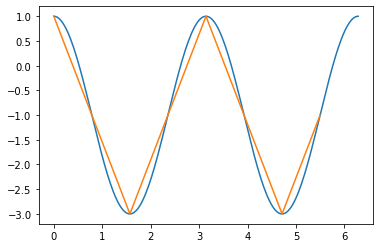

In [126]:
###computing the integrals for each panel to calculate the velocities on the surface of the octagon
#first must compute phi angles based on octagon geometry
phiVector=[np.pi/2, np.pi/4, 0, -np.pi/4,-np.pi/2, 5*np.pi/4, np.pi, 3*np.pi/4]
#for integral, need to compute matrices and vectors A,B,C,D,E
#first compute x and X, y and Y
X=[-0.9239, -0.9239,-0.3827,0.3827,0.9239,0.9239,0.3827,-0.3827]
Y=[-0.3827,0.3827,0.9239,0.9239,0.3827,-0.3827,-0.9239,-0.9239]
x=[-0.9239,-0.6533,0,0.6533,0.9239,0.6533,0,-0.6533]
y=[0,0.6533,0.9239,0.6533,0,-0.6533,-0.9239,-0.6533]

I=np.zeros((8,8))
b=np.zeros(8)
V=np.zeros((8,8))
for i in np.arange(len(x)):
    for j in np.arange(len(x)):
        A=-(x[i]-X[j])*np.cos(phiVector[j])-(y[i]-Y[j])*np.sin(phiVector[j])
        B=((x[i]-X[j])**2)+((y[i]-Y[j])**2)
        C=np.sin(phiVector[i]-phiVector[j])
        D=(y[i]-Y[j])*np.cos(phiVector[i])-(x[i]-X[j])*np.sin(phiVector[i])
        if j==7:
            S=(((X[0]-X[j])**2)+((Y[0]-Y[j])**2))**0.5
        else:
            S=(((X[j+1]-X[j])**2)+((Y[j+1]-Y[j])**2))**0.5
        E=(x[i]-X[j])*np.sin(phiVector[j])-(y[i]-Y[j])*np.cos(phiVector[j])
        
        if i==j:
            I[i,j]=np.pi
            V[i,j]=0
        else:
            I[i,j]=(C/2)*np.log(((S**2)+2*A*S+B)/B)+((D-A*C)/E)*(np.arctan((S+A)/E)-np.arctan(A/E))
            V[i,j]=((D-A*C)/(2*E))*np.log(((S**2)+2*A*S+B)/B)-C*(np.arctan((S+A)/E)-np.arctan(A/E))
        b[i]=np.sin(phiVector[i])
l=linalg.solve(I,b)

print(l)


theta=np.linspace(0,2*np.pi,200)
thetaDiscrete=np.linspace(0,7*np.pi/4,8)
analyticCp=1-4*(np.sin(theta))**2
v=np.cos(phiVector)+np.matmul(V,l)

Cp=1-(v**2)
plt.plot(theta,analyticCp)
plt.plot(thetaDiscrete,Cp)



##part 1 complete

[ 0.38050638  0.09065989 -0.04283093 -0.13909594 -1.57079633  3.2806886
  3.18442359  3.05093277  2.76108628]
[0.09065989 0.38050638 2.76108628 3.05093277 3.18442359 3.2806886
 4.71238898 6.14408937 6.24035437]
[ 0.07674089  0.01735781 -0.00927291 -0.02380738 -0.2922889  -0.02380738
 -0.00927291  0.01735781  0.07674089]
[-0.00773565 -0.33478747 -0.30409274 -0.26938309  1.         -0.26938309
 -0.30409274 -0.33478747 -0.00773565]


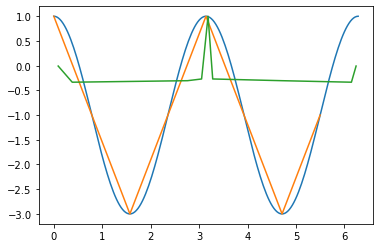

In [161]:
#part 2
#same process as above
X=[-1,-0.75,-0.2,0.5,1,1,0.5,-0.2,-0.75]
Y=[0,0.1,0.15,0.12,0.05,-0.05,-0.12,-0.15,-0.1]
x=np.convolve(X,[0.5,0.5],'valid')
x=np.append(x,-0.875)
y=np.convolve(Y,[0.5,0.5],'valid')
y=np.append(y,-0.05)
I=np.zeros((9,9))
b=np.zeros(9)
phi=np.zeros(9)
V=np.zeros((9,9))
i=0
j=0
for i in np.arange(9):
    if i==8:
        phi[i]=np.arctan((Y[0]-Y[i])/(X[0]-X[i]))
    elif X[i+1]==X[i]:
        phi[i]=-np.pi/2
    else:
        phi[i]=np.arctan((Y[i+1]-Y[i])/(X[i+1]-X[i]))

phi=phi+[0,0,0,0,0,np.pi,np.pi,np.pi,np.pi]
phi2=phi+[0,0,2*np.pi,2*np.pi,2*np.pi,0,0,0,0]
phi2=np.sort(phi2)
for i in np.arange(9):
    for j in np.arange(9):
        A=-(x[i]-X[j])*np.cos(phi[j])-(y[i]-Y[j])*np.sin(phi[j])
        B=((x[i]-X[j])**2)+((y[i]-Y[j])**2)
        C=np.sin(phi[i]-phi[j])
        D=(y[i]-Y[j])*np.cos(phi[i])-(x[i]-X[j])*np.sin(phi[i])
        if j==8:
            S=(((X[0]-X[j])**2)+((Y[0]-Y[j])**2))**0.5
        else:
            S=(((X[j+1]-X[j])**2)+((Y[j+1]-Y[j])**2))**0.5
        E=(x[i]-X[j])*np.sin(phi[j])-(y[i]-Y[j])*np.cos(phi[j])
       
        if i==j:
            I[i,j]=np.pi
            V[i,j]=0
        else:
            I[i,j]=(C/2)*np.log(((S**2)+2*A*S+B)/B)+((D-A*C)/E)*(np.arctan((S+A)/E)-np.arctan(A/E))
            V[i,j]=((D-A*C)/(2*E))*np.log(((S**2)+2*A*S+B)/B)-C*(np.arctan((S+A)/E)-np.arctan(A/E))
            
        b[i]=np.sin(phi[i])
l2=linalg.solve(I,b)
print(l2)

analyticCp=1-4*(np.sin(theta))**2
v=np.cos(phi)+np.matmul(V,l2)
Cp2=1-(v**2)
plt.plot(theta,analyticCp)
plt.plot(thetaDiscrete,Cp)

print(Cp2)
plt.plot(phi2,Cp2)
